In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np

In [ ]:

# Install RDKit
!pip install rdkit-pypi
!pip install --upgrade rdkit-pypi pandas

from rdkit import Chem
from rdkit.Chem import PandasTools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 94.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


In [ ]:
# Define the path to your files in Google Drive
np_metadata_xml_file_path = '/content/drive/MyDrive/CSC461/npmrd_natural_products_NP0000001_NP0050000.xml'
np_structures_sdf_file_path = '/content/drive/My Drive/CSC461/structures_NP0000001_NP0050000.sdf'
DFT_sdf_file_path = '/content/drive/My Drive/CSC461/DFT.sdf'
NMR8K_sdf_file_path = '/content/drive/My Drive/CSC461/NMR8K.sdf'



In [ ]:
#np_metadata_df = pd.read_xml(np_metadata_xml_file_path)
#np_structures_df = PandasTools.LoadSDF(np_structures_sdf_file_path, smilesName='SMILES', molColName='Molecule', removeHs=False)
DFT_df = PandasTools.LoadSDF(DFT_sdf_file_path, smilesName='SMILES', molColName='Molecule', removeHs=False)
#NMR8K_df = PandasTools.LoadSDF(NMR8K_sdf_file_path, smilesName='SMILES', molColName='Molecule', removeHs=False)

[04:51:18] Warning: molecule is tagged as 3D, but all Z coords are zero
[04:51:18] Warning: molecule is tagged as 3D, but all Z coords are zero
[04:51:19] Warning: molecule is tagged as 3D, but all Z coords are zero
[04:51:20] Warning: molecule is tagged as 3D, but all Z coords are zero
[04:51:20] Warning: molecule is tagged as 3D, but all Z coords are zero
[04:51:20] Warning: molecule is tagged as 3D, but all Z coords are zero
[04:51:21] Warning: molecule is tagged as 3D, but all Z coords are zero
[04:51:21] Warning: molecule is tagged as 3D, but all Z coords are zero
[04:51:21] Warning: molecule is tagged as 3D, but all Z coords are zero
[04:51:21] Warning: molecule is tagged as 3D, but all Z coords are zero
[04:51:22] Warning: molecule is tagged as 3D, but all Z coords are zero
Failed to patch pandas - unable to change molecule rendering


In [ ]:
# Load molecules and SMILES manually
def load_sdf_as_dataframe(filepath, smiles_col='SMILES', mol_col='Molecule'):
    supplier = Chem.SDMolSupplier(filepath)
    data = []
    for mol in supplier:
        if mol is not None:
            smiles = Chem.MolToSmiles(mol)
            data.append({smiles_col: smiles, mol_col: mol})
    return pd.DataFrame(data)

# Use the function
#DFT_df = load_sdf_as_dataframe(DFT_sdf_file_path)

[15:36:09] Warning: molecule is tagged as 3D, but all Z coords are zero
[15:36:10] Warning: molecule is tagged as 3D, but all Z coords are zero
[15:36:10] Warning: molecule is tagged as 3D, but all Z coords are zero
[15:36:10] Warning: molecule is tagged as 3D, but all Z coords are zero
[15:36:10] Warning: molecule is tagged as 3D, but all Z coords are zero
[15:36:11] Warning: molecule is tagged as 3D, but all Z coords are zero
[15:36:11] Warning: molecule is tagged as 3D, but all Z coords are zero
[15:36:11] Warning: molecule is tagged as 3D, but all Z coords are zero
[15:36:11] Warning: molecule is tagged as 3D, but all Z coords are zero
[15:36:11] Warning: molecule is tagged as 3D, but all Z coords are zero
[15:36:12] Warning: molecule is tagged as 3D, but all Z coords are zero


In [ ]:
from rdkit.Chem import inchi

DFT_df['InChI'] = DFT_df['Molecule'].apply(lambda mol: inchi.MolToInchi(mol) if mol is not None else None)
DFT_df.head()

[15:36:26] WARNING: Omitted undefined stereo

[15:36:26] WARNING: Omitted undefined stereo

[15:36:26] WARNING: Omitted undefined stereo

[15:36:26] WARNING: Omitted undefined stereo

[15:36:26] WARNING: Omitted undefined stereo

[15:36:26] WARNING: Omitted undefined stereo

[15:36:26] WARNING: Ambiguous stereo: center(s)

[15:36:26] WARNING: Omitted undefined stereo

[15:36:26] WARNING: Omitted undefined stereo

[15:36:26] WARNING: Omitted undefined stereo

[15:36:26] WARNING: Omitted undefined stereo

[15:36:26] WARNING: Omitted undefined stereo

[15:36:26] WARNING: Omitted undefined stereo

[15:36:26] WARNING: Omitted undefined stereo

[15:36:26] WARNING: Omitted undefined stereo

[15:36:26] WARNING: Omitted undefined stereo

[15:36:26] WARNING: Omitted undefined stereo

[15:36:26] WARNING: Omitted undefined stereo

[15:36:26] WARNING: Omitted undefined stereo

[15:36:26] WARNING: Omitted undefined stereo

[15:36:26] WARNING: Omitted undefined stereo

[15:36:26] WARNING: Omitted und

,SMILES,Molecule,InChI
0,O=S(=O)(Cc1c(F)c(F)c(F)c(F)c1F)C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x7dfd18eb2650>,"InChI=1S/C8H2F8O2S/c9-3-2(1-19(17,18)8(14,15)1..."
1,Fc1ccccc1CN1CNc2ccccc2C1,<rdkit.Chem.rdchem.Mol object at 0x7dfd18eb26c0>,InChI=1S/C15H15FN2/c16-14-7-3-1-5-12(14)9-18-1...
2,CC(=O)OCCc1ccc(C(C)=O)cc1,<rdkit.Chem.rdchem.Mol object at 0x7dfd18eb2730>,InChI=1S/C12H14O3/c1-9(13)12-5-3-11(4-6-12)7-8...
3,COc1cc2ccnc(C)c2cc1OC,<rdkit.Chem.rdchem.Mol object at 0x7dfd18eb27a0>,InChI=1S/C12H13NO2/c1-8-10-7-12(15-3)11(14-2)6...
4,OCC#CCO,<rdkit.Chem.rdchem.Mol object at 0x7dfd18eb2810>,"InChI=1S/C4H6O2/c5-3-1-2-4-6/h5-6H,3-4H2"


In [ ]:
pd.set_option('display.max_columns', None)
np_structures_df.head()


,DATABASE_ID,DATABASE_NAME,SMILES,INCHI_IDENTIFIER,INCHI_KEY,FORMULA,MOLECULAR_WEIGHT,EXACT_MASS,JCHEM_ACCEPTOR_COUNT,JCHEM_ATOM_COUNT,JCHEM_AVERAGE_POLARIZABILITY,JCHEM_BIOAVAILABILITY,JCHEM_DONOR_COUNT,JCHEM_FORMAL_CHARGE,JCHEM_GHOSE_FILTER,JCHEM_IUPAC,ALOGPS_LOGP,JCHEM_LOGP,ALOGPS_LOGS,JCHEM_MDDR_LIKE_RULE,JCHEM_NUMBER_OF_RINGS,JCHEM_PHYSIOLOGICAL_CHARGE,JCHEM_PKA_STRONGEST_ACIDIC,JCHEM_PKA_STRONGEST_BASIC,JCHEM_POLAR_SURFACE_AREA,JCHEM_REFRACTIVITY,JCHEM_ROTATABLE_BOND_COUNT,JCHEM_RULE_OF_FIVE,ALOGPS_SOLUBILITY,JCHEM_TRADITIONAL_IUPAC,JCHEM_VEBER_RULE,NP-MRD_ID,GENERIC_NAME,ID,Molecule,JCHEM_PKA
0,NP0000001,NP-MRD,[H]C1=C2C([H])([H])N3C([H])([H])C([H])([H])[C@...,InChI=1S/C21H22N2O2/c24-18-10-16-19-13-9-17-21...,QMGVPVSNSZLJIA-FVWCLLPLSA-N,C21H22N2O2,334.4116,334.168127958,3,47,35.81142718893862,1,0,0,1,"(1R,11S,18S,20R,21R,22S)-12-oxa-8,17-diazahept...",1.68,0.9265213356666664,-2.29,0,7,1,17.23974507177593,9.27349386578478,32.78,94.5077,0,1,1.72e+00 g/l,"(1R,11S,18S,20R,21R,22S)-12-oxa-8,17-diazahept...",1,NP0000001,Strychnine,,<rdkit.Chem.rdchem.Mol object at 0x78300c776110>,NaN
1,NP0000003,NP-MRD,O=c1ccc2cc3ccoc3cc2o1,InChI=1S/C11H6O3/c12-11-2-1-7-5-8-3-4-13-9(8)6...,ZCCUUQDIBDJBTK-UHFFFAOYSA-N,C11H6O3,186.166,186.031694053,1,20,18.095235182105146,1,0,0,1,"7H-furo[3,2-g]chromen-7-one",2.15,1.9424830159999997,-3.14,0,3,0,NaN,-2.8920811389599157,39.44,50.389700000000005,0,1,1.34e-01 g/l,psoralen,1,NP0000003,Psoralen,Psoralen,<rdkit.Chem.rdchem.Mol object at 0x78300c7761f0>,NaN
2,NP0000004,NP-MRD,CN1C(=O)CCC1c1cccnc1,InChI=1S/C10H12N2O/c1-12-9(4-5-10(12)13)8-3-2-...,UIKROCXWUNQSPJ-UHFFFAOYSA-N,C10H12N2O,176.2151,176.094963016,2,25,18.57458933125395,1,0,0,1,1-methyl-5-(pyridin-3-yl)pyrrolidin-2-one,0.39,0.2106345276666668,-0.18,0,2,0,NaN,4.789340020074378,33.2,49.2805,1,1,1.17e+02 g/l,(-)-cotinine,1,NP0000004,Cotinine,,<rdkit.Chem.rdchem.Mol object at 0x78300c776340>,NaN
3,NP0000005,NP-MRD,O=c1ccc2ccccc2o1,InChI=1S/C9H6O2/c10-9-6-5-7-3-1-2-4-8(7)11-9/h...,ZYGHJZDHTFUPRJ-UHFFFAOYSA-N,C9H6O2,146.145,146.036779433,1,17,14.362215597078222,1,0,0,0,2H-chromen-2-one,1.72,1.783359615333333,-2.16,0,2,0,NaN,-6.940141845991088,26.3,41.54860000000001,0,1,1.00e+00 g/l,coumarin,1,NP0000005,Coumarin,Coumarin,<rdkit.Chem.rdchem.Mol object at 0x78300c776420>,NaN
4,NP0000006,NP-MRD,c1cncc(C2CCCCN2)c1,InChI=1S/C10H14N2/c1-2-7-12-10(5-1)9-4-3-6-11-...,MTXSIJUGVMTTMU-UHFFFAOYSA-N,C10H14N2,162.2316,162.115698458,2,26,18.710686600754574,1,1,0,1,3-(piperidin-2-yl)pyridine,0.90,1.2240554203333331,-1.21,0,2,1,NaN,8.997605501479326,24.92,48.96130000000001,1,1,9.90e+00 g/l,anabasine,1,NP0000006,Anabasine,,<rdkit.Chem.rdchem.Mol object at 0x78300c7765e0>,NaN


In [ ]:
np_structures_df.shape

(46837, 36)

In [ ]:

# Group by 'FORMULA' and identify groups with multiple unique 'GENERIC_NAME'
grouped = np_structures_df.groupby('FORMULA')['GENERIC_NAME'].nunique()

# Filter for formulas with more than one unique 'GENERIC_NAME'
conflicting_formulas = grouped[grouped > 1].index

# Extract rows with conflicting formulas
conflicting_entries = np_structures_df[np_structures_df['FORMULA'].isin(conflicting_formulas)]

#pd.set_option('display.max_rows', None)
conflicting_entries


Standardized Name Mapping:
{'(C12H19NO19S3)NH2O': 'Heparin', '(C12H20O11)NC2H6': 'Amylose', '(C5H8)NC14H20O4': 'Ubiquinone-1', 'AG': 'Silver', 'ALH3': 'Aluminum', 'ALH7MGNAOSI': 'Bentonite', 'ASH3': 'Arsenic', 'AU': 'Gold', 'BA': 'Barium', 'BE': 'Beryllium', 'BH3': 'Boron', 'BR2': 'Bromine', 'C101H121CL2N9O46': 'GalacardinA', 'C101H139N23O27': 'Microcin J25', 'C101H153N29O27': 'Lariatin', 'C102H162O48': 'gummiferaoside', 'C102H72O66': 'Oenothein', 'C102H72O67': 'Oenotherin', 'C103H113N23O23': 'RES-701-1', 'C103H115N23O24': 'RES-701-2', 'C103H115N23O25': 'RES-701-4', 'C103H131N23O26': 'Actinokineosin', 'C104H162O57': 'clematochinenoside', 'C104H170N24O27': 'Syringopeptin SP508', 'C105H130N24O24': 'Propeptin-2', 'C106H139N17O26': 'Mohangamide', 'C106H174N24O27': 'Syringopeptin, SP508', 'C107H139N17O26': 'Mohangamide', 'C107H160N22O30': 'Streptomonomicin', 'C107H164N22O28S2': 'Curvopeptin-2', 'C109H167N23O29S2': 'Curvopeptin-3', 'C10H10BR2CL4': '(1Z,3E,7E)-9-bromo-(1Z,5R*,6R*,9)-tetrachlo

In [ ]:
pd.set_option('display.max_rows', None)
nps_edited_df = np_structures_df
nps_edited_df['GENERIC_NAME'] = nps_edited_df['GENERIC_NAME'].str.replace(r'\b[A-Z]\b', '', regex=True).str.strip()

nps_edited_df['GENERIC_NAME'].value_counts().head()


,count
GENERIC_NAME,
Thielavin,23
antiaroside,22
Macrolactin,21
Floricolin,21
Speciosin,20


In [ ]:
vc1 = nps_edited_df['GENERIC_NAME'].value_counts()
vc2 = nps_edited_df['FORMULA'].value_counts()

side_by_side = pd.DataFrame({
  'GENERIC_NAME': vc1,
  'FORMULA': vc2
})
filtered = side_by_side.dropna()

filtered

,GENERIC_NAME,FORMULA


In [ ]:
np_metadata_df.head()

,version,creation_date,update_date,accession,secondary_accessions,name,description,synonyms,chemical_formula,average_molecular_weight,monisotopic_molecular_weight,iupac_name,traditional_iupac,cas_registry_number,smiles,inchi,inchikey,taxonomy,experimental_properties,predicted_properties,kegg_id,chemspider_id,pdb_id,chebi_id,pubchem_compound_id,drugbank_id,wikipedia_id,foodb_id,phenol_explorer_compound_id,biocyc_id,knapsack_id,bigg_id,metlin_id,general_references
0,1.0,2019-05-20 17:30:31 UTC,2024-09-03 04:21:43 UTC,NP0000001,\n,Strychnine,"Strychnine, also known as strychnin, is an ext...",\n,C21H22N2O2,334.4116,334.168128,"(1R,11S,18S,20R,21R,22S)-12-oxa-8,17-diazahept...","(1R,11S,18S,20R,21R,22S)-12-oxa-8,17-diazahept...",57-24-9,[H]C1=C([H])C([H])=C2C(=C1[H])N1C(=O)C([H])([H...,InChI=1S/C21H22N2O2/c24-18-10-16-19-13-9-17-21...,QMGVPVSNSZLJIA-FVWCLLPLSA-N,\n,\n,\n,C06522,389877.0,None,28973.0,NaN,None,Strychnine,None,NaN,None,C00001770,NaN,NaN,\n
1,1.0,2012-09-11 19:04:36 UTC,2024-09-03 04:16:58 UTC,NP0000003,\n,Psoralen,"Psoralen, also known as psoralene, ficusin or ...",\n,C11H6O3,186.1660,186.031694,None,None,66-97-7,O=C1OC2=CC3=C(C=CO3)C=C2C=C1,InChI=1S/C11H6O3/c12-11-2-1-7-5-8-3-4-13-9(8)6...,ZCCUUQDIBDJBTK-UHFFFAOYSA-N,\n,\n,\n,C09305,5964.0,None,27616.0,6199.0,None,Psoralen,FDB012605,718.0,None,C00000297,NaN,NaN,\n
2,1.0,2005-11-16 15:48:42 UTC,2024-09-03 04:17:59 UTC,NP0000004,\n,Cotinine,Cotinine is an alkaloid found in tobacco (Nico...,\n,C10H12N2O,176.2151,176.094963,1-methyl-5-(pyridin-3-yl)pyrrolidin-2-one,(-)-cotinine,486-56-6,CN1C(CCC1=O)C1=CN=CC=C1,InChI=1S/C10H12N2O/c1-12-9(4-5-10(12)13)8-3-2-...,UIKROCXWUNQSPJ-UHFFFAOYSA-N,\n,\n,\n,None,395.0,None,127762.0,408.0,None,Cotinine,FDB004716,NaN,None,C00034470,NaN,1531.0,\n
3,1.0,2005-11-16 15:48:42 UTC,2024-09-03 04:16:50 UTC,NP0000005,\n,Coumarin,Coumarin belongs to the class of chemicals kno...,\n,C9H6O2,146.1450,146.036779,2H-chromen-2-one,coumarin,91-64-5,O=C1OC2=CC=CC=C2C=C1,InChI=1S/C9H6O2/c10-9-6-5-7-3-1-2-4-8(7)11-9/h...,ZYGHJZDHTFUPRJ-UHFFFAOYSA-N,\n,\n,\n,C05851,13848793.0,None,28794.0,323.0,DB04665,Coumarin,FDB030742,635.0,COUMARIN,C00002460,46647.0,3525.0,\n
4,1.0,2006-08-13 17:16:37 UTC,2021-10-07 20:41:06 UTC,NP0000006,\n,Anabasine,Anabasine is a pyridine and piperidine alkaloi...,\n,C10H14N2,162.2316,162.115698,3-(piperidin-2-yl)pyridine,anabasine,13078-04-1,C1CCC(NC1)C1=CN=CC=C1,InChI=1S/C10H14N2/c1-2-7-12-10(5-1)9-4-3-6-11-...,MTXSIJUGVMTTMU-UHFFFAOYSA-N,\n,\n,\n,C06180,21106257.0,None,28986.0,2181.0,None,Anabasine,FDB023366,NaN,None,C00002015,NaN,3283.0,\n


In [ ]:
 nps_edited_df.head()

,DATABASE_ID,DATABASE_NAME,SMILES,INCHI_IDENTIFIER,INCHI_KEY,FORMULA,MOLECULAR_WEIGHT,EXACT_MASS,JCHEM_ACCEPTOR_COUNT,JCHEM_ATOM_COUNT,JCHEM_AVERAGE_POLARIZABILITY,JCHEM_BIOAVAILABILITY,JCHEM_DONOR_COUNT,JCHEM_FORMAL_CHARGE,JCHEM_GHOSE_FILTER,JCHEM_IUPAC,ALOGPS_LOGP,JCHEM_LOGP,ALOGPS_LOGS,JCHEM_MDDR_LIKE_RULE,JCHEM_NUMBER_OF_RINGS,JCHEM_PHYSIOLOGICAL_CHARGE,JCHEM_PKA_STRONGEST_ACIDIC,JCHEM_PKA_STRONGEST_BASIC,JCHEM_POLAR_SURFACE_AREA,JCHEM_REFRACTIVITY,JCHEM_ROTATABLE_BOND_COUNT,JCHEM_RULE_OF_FIVE,ALOGPS_SOLUBILITY,JCHEM_TRADITIONAL_IUPAC,JCHEM_VEBER_RULE,NP-MRD_ID,GENERIC_NAME,ID,Molecule,JCHEM_PKA
0,NP0000001,NP-MRD,[H]C1=C2C([H])([H])N3C([H])([H])C([H])([H])[C@...,InChI=1S/C21H22N2O2/c24-18-10-16-19-13-9-17-21...,QMGVPVSNSZLJIA-FVWCLLPLSA-N,C21H22N2O2,334.4116,334.168127958,3,47,35.81142718893862,1,0,0,1,"(1R,11S,18S,20R,21R,22S)-12-oxa-8,17-diazahept...",1.68,0.9265213356666664,-2.29,0,7,1,17.23974507177593,9.27349386578478,32.78,94.5077,0,1,1.72e+00 g/l,"(1R,11S,18S,20R,21R,22S)-12-oxa-8,17-diazahept...",1,NP0000001,Strychnine,,<rdkit.Chem.rdchem.Mol object at 0x7eefc21ad0e0>,NaN
1,NP0000003,NP-MRD,O=c1ccc2cc3ccoc3cc2o1,InChI=1S/C11H6O3/c12-11-2-1-7-5-8-3-4-13-9(8)6...,ZCCUUQDIBDJBTK-UHFFFAOYSA-N,C11H6O3,186.166,186.031694053,1,20,18.095235182105146,1,0,0,1,"7H-furo[3,2-g]chromen-7-one",2.15,1.9424830159999997,-3.14,0,3,0,NaN,-2.8920811389599157,39.44,50.389700000000005,0,1,1.34e-01 g/l,psoralen,1,NP0000003,Psoralen,Psoralen,<rdkit.Chem.rdchem.Mol object at 0x7eefc21ad310>,NaN
2,NP0000004,NP-MRD,CN1C(=O)CCC1c1cccnc1,InChI=1S/C10H12N2O/c1-12-9(4-5-10(12)13)8-3-2-...,UIKROCXWUNQSPJ-UHFFFAOYSA-N,C10H12N2O,176.2151,176.094963016,2,25,18.57458933125395,1,0,0,1,1-methyl-5-(pyridin-3-yl)pyrrolidin-2-one,0.39,0.2106345276666668,-0.18,0,2,0,NaN,4.789340020074378,33.2,49.2805,1,1,1.17e+02 g/l,(-)-cotinine,1,NP0000004,Cotinine,,<rdkit.Chem.rdchem.Mol object at 0x7eefc21ac970>,NaN
3,NP0000005,NP-MRD,O=c1ccc2ccccc2o1,InChI=1S/C9H6O2/c10-9-6-5-7-3-1-2-4-8(7)11-9/h...,ZYGHJZDHTFUPRJ-UHFFFAOYSA-N,C9H6O2,146.145,146.036779433,1,17,14.362215597078222,1,0,0,0,2H-chromen-2-one,1.72,1.783359615333333,-2.16,0,2,0,NaN,-6.940141845991088,26.3,41.54860000000001,0,1,1.00e+00 g/l,coumarin,1,NP0000005,Coumarin,Coumarin,<rdkit.Chem.rdchem.Mol object at 0x7eefc21ac9e0>,NaN
4,NP0000006,NP-MRD,c1cncc(C2CCCCN2)c1,InChI=1S/C10H14N2/c1-2-7-12-10(5-1)9-4-3-6-11-...,MTXSIJUGVMTTMU-UHFFFAOYSA-N,C10H14N2,162.2316,162.115698458,2,26,18.710686600754574,1,1,0,1,3-(piperidin-2-yl)pyridine,0.90,1.2240554203333331,-1.21,0,2,1,NaN,8.997605501479326,24.92,48.96130000000001,1,1,9.90e+00 g/l,anabasine,1,NP0000006,Anabasine,,<rdkit.Chem.rdchem.Mol object at 0x7eefc21ac6d0>,NaN


## Getting pertinent data thats going to be passed into the machine learning model
- This is just creating a column containing the number of atoms in each molecule

In [ ]:
stripped_df = np_structures_df[['DATABASE_ID', 'Molecule']]
stripped_df = stripped_df.reset_index(drop=True)
stripped_df['Atom_number'] = np.nan
for i in range(len(stripped_df)):
  stripped_df.at[i, 'Atom_number'] = stripped_df.at[i, 'Molecule'].GetNumAtoms()

stripped_df['Atom_number'] = stripped_df['Atom_number'].astype(int)
stripped_df.head()


,DATABASE_ID,Molecule,Atom_number
0,NP0000001,<rdkit.Chem.rdchem.Mol object at 0x7d2c6537ce40>,47
1,NP0000003,<rdkit.Chem.rdchem.Mol object at 0x7d2c6537cdd0>,14
2,NP0000004,<rdkit.Chem.rdchem.Mol object at 0x7d2c6537ceb0>,13
3,NP0000005,<rdkit.Chem.rdchem.Mol object at 0x7d2c6537d000>,11
4,NP0000006,<rdkit.Chem.rdchem.Mol object at 0x7d2c6537d150>,12


# Working with the DFT Dataset

In [ ]:
def mol_diagnostics(molecule):
  for atom_index in range(molecule.GetNumAtoms()):
      atom = molecule.GetAtomWithIdx(atom_index)
      atom_name = atom.GetSymbol()
      atom_mass = atom.GetMass()
      atom_charge = atom.GetFormalCharge()

      print(f"Atom {atom_index}: Name={atom_name}, Mass={atom_mass}, Charge={atom_charge}")

In [ ]:
stripped_df = DFT_df[['Molecule']]
stripped_df = stripped_df.reset_index(drop=True)
stripped_df['Atom_number'] = np.nan
stripped_df['mol_id'] = np.nan
for i in range(len(stripped_df)):
  stripped_df.at[i, 'Atom_number'] = stripped_df.at[i, 'Molecule'].GetNumAtoms()
  stripped_df.at[i, 'mol_id'] = stripped_df.at[i, 'Molecule'].GetProp('_Name')

stripped_df['Atom_number'] = stripped_df['Atom_number'].astype(int)
stripped_df['mol_id'] = stripped_df['mol_id'].astype(int)

stripped_df.head()

mol_diagnostics(stripped_df.at[0,'Molecule'])

<ipython-input-7-2589c5b3903f>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '20212894' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stripped_df.at[i, 'mol_id'] = stripped_df.at[i, 'Molecule'].GetProp('_Name')


Atom 0: Name=C, Mass=12.011, Charge=0
Atom 1: Name=C, Mass=12.011, Charge=0
Atom 2: Name=C, Mass=12.011, Charge=0
Atom 3: Name=C, Mass=12.011, Charge=0
Atom 4: Name=C, Mass=12.011, Charge=0
Atom 5: Name=C, Mass=12.011, Charge=0
Atom 6: Name=C, Mass=12.011, Charge=0
Atom 7: Name=C, Mass=12.011, Charge=0
Atom 8: Name=O, Mass=15.999, Charge=0
Atom 9: Name=O, Mass=15.999, Charge=0
Atom 10: Name=S, Mass=32.067, Charge=0
Atom 11: Name=F, Mass=18.998, Charge=0
Atom 12: Name=F, Mass=18.998, Charge=0
Atom 13: Name=F, Mass=18.998, Charge=0
Atom 14: Name=F, Mass=18.998, Charge=0
Atom 15: Name=F, Mass=18.998, Charge=0
Atom 16: Name=F, Mass=18.998, Charge=0
Atom 17: Name=F, Mass=18.998, Charge=0
Atom 18: Name=F, Mass=18.998, Charge=0
Atom 19: Name=H, Mass=1.008, Charge=0
Atom 20: Name=H, Mass=1.008, Charge=0


- Reading in the chemical shift data for the DFT dataset

In [ ]:
shift_csv_path =  '/content/drive/My Drive/CSC461/DFT8K.csv'
shift_df = pd.read_csv(shift_csv_path, index_col=0)
shift_df.head()

,mol_id,atom_type,atom_index,Shift
33733,2192,6,0,107.011410
33734,2192,6,1,158.850228
33735,2192,6,2,106.134826
33736,2192,6,3,4.912208
33737,2192,6,4,159.008825


In [ ]:
shift_df = shift_df.loc[shift_df.atom_type == 1]
shift_df['Mol'] = np.nan
id_dft_df = stripped_df.set_index('mol_id')
shift_df = shift_df[shift_df['mol_id'] != 20176318]
shift_df = shift_df.reset_index(drop=True)

for i in range(len(shift_df)):
  mol_id = int(shift_df.at[i, 'mol_id'])
  try:
    shift_df.at[i,'Mol'] = id_dft_df.at[mol_id, 'Molecule']
  except:
    print(mol_id)
#shift_df.head()
mol_diagnostics(shift_df.at[0,'Mol'])

<ipython-input-9-db6e7849b5f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shift_df['Mol'] = np.nan
<ipython-input-9-db6e7849b5f1>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<rdkit.Chem.rdchem.Mol object at 0x78d6a9e8c120>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  shift_df.at[i,'Mol'] = id_dft_df.at[mol_id, 'Molecule']


Atom 0: Name=C, Mass=12.011, Charge=0
Atom 1: Name=C, Mass=12.011, Charge=0
Atom 2: Name=C, Mass=12.011, Charge=0
Atom 3: Name=C, Mass=12.011, Charge=0
Atom 4: Name=C, Mass=12.011, Charge=0
Atom 5: Name=C, Mass=12.011, Charge=0
Atom 6: Name=C, Mass=12.011, Charge=0
Atom 7: Name=C, Mass=12.011, Charge=0
Atom 8: Name=C, Mass=12.011, Charge=0
Atom 9: Name=C, Mass=12.011, Charge=0
Atom 10: Name=C, Mass=12.011, Charge=0
Atom 11: Name=C, Mass=12.011, Charge=0
Atom 12: Name=O, Mass=15.999, Charge=0
Atom 13: Name=O, Mass=15.999, Charge=0
Atom 14: Name=O, Mass=15.999, Charge=0
Atom 15: Name=C, Mass=12.011, Charge=0
Atom 16: Name=O, Mass=15.999, Charge=0
Atom 17: Name=C, Mass=12.011, Charge=0
Atom 18: Name=C, Mass=12.011, Charge=0
Atom 19: Name=C, Mass=12.011, Charge=0
Atom 20: Name=C, Mass=12.011, Charge=0
Atom 21: Name=C, Mass=12.011, Charge=0
Atom 22: Name=C, Mass=12.011, Charge=0
Atom 23: Name=C, Mass=12.011, Charge=0
Atom 24: Name=C, Mass=12.011, Charge=0
Atom 25: Name=C, Mass=12.011, Charg

- This final df has all the information in one dataframe and is (hopefully) close to being fully preprocessed. This covers up to line 44 in this script (https://github.com/patonlab/CASCADE/blob/master/code/predicting_model/H/DFTNN/preprocess_pubchem.py)

In [ ]:
from rdkit.Chem import Draw

def to_C(atom):
    neighbors = [x.GetAtomicNum() for x in atom.GetNeighbors()]
    if 6 in neighbors:
        return True
    else:
        return False

#Note: This line will filter the dataframe for hydrogens that are specifically next to carbons, I'm not sure if we need to do this though.
#shift_df = shift_df.loc[shift_df.apply(lambda x: to_C(x['Mol'].GetAtomWithIdx(x['atom_index'])), axis=1).values].head()


In [ ]:
molecule = shift_df.at[0, 'Mol']

mol_diagnostics(molecule)

Atom 0: Name=C, Mass=12.011, Charge=0
Atom 1: Name=C, Mass=12.011, Charge=0
Atom 2: Name=C, Mass=12.011, Charge=0
Atom 3: Name=C, Mass=12.011, Charge=0
Atom 4: Name=C, Mass=12.011, Charge=0
Atom 5: Name=C, Mass=12.011, Charge=0
Atom 6: Name=C, Mass=12.011, Charge=0
Atom 7: Name=C, Mass=12.011, Charge=0
Atom 8: Name=C, Mass=12.011, Charge=0
Atom 9: Name=C, Mass=12.011, Charge=0
Atom 10: Name=C, Mass=12.011, Charge=0
Atom 11: Name=C, Mass=12.011, Charge=0
Atom 12: Name=O, Mass=15.999, Charge=0
Atom 13: Name=O, Mass=15.999, Charge=0
Atom 14: Name=O, Mass=15.999, Charge=0
Atom 15: Name=C, Mass=12.011, Charge=0
Atom 16: Name=O, Mass=15.999, Charge=0
Atom 17: Name=C, Mass=12.011, Charge=0
Atom 18: Name=C, Mass=12.011, Charge=0
Atom 19: Name=C, Mass=12.011, Charge=0
Atom 20: Name=C, Mass=12.011, Charge=0
Atom 21: Name=C, Mass=12.011, Charge=0
Atom 22: Name=C, Mass=12.011, Charge=0
Atom 23: Name=C, Mass=12.011, Charge=0
Atom 24: Name=C, Mass=12.011, Charge=0
Atom 25: Name=C, Mass=12.011, Charg

In [ ]:
shift_df.columns
shift_df.head()

,mol_id,atom_type,atom_index,Shift,Mol
0,2192,1,31,6.286228,<rdkit.Chem.rdchem.Mol object at 0x78d6a9e8c120>
1,2192,1,32,1.851577,<rdkit.Chem.rdchem.Mol object at 0x78d6a9e8c120>
2,2192,1,33,3.060770,<rdkit.Chem.rdchem.Mol object at 0x78d6a9e8c120>
3,2192,1,34,1.828776,<rdkit.Chem.rdchem.Mol object at 0x78d6a9e8c120>
4,2192,1,35,2.114794,<rdkit.Chem.rdchem.Mol object at 0x78d6a9e8c120>


In [ ]:
group_object = shift_df.groupby(['mol_id'])
shift_list = []
for mol_id,group in group_object:
  shift_list.append([mol_id[0],group.atom_index.values.astype('int'), group.Shift.values.astype('float32')])
  if len(group.atom_index.values) != len(set(group.atom_index.values)):
        print(mol_id)
shift_list[0]

[2192,
 array([31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49, 50, 51, 52, 53, 54, 55, 56]),
 array([ 6.2862277,  1.8515768,  3.06077  ,  1.8287755,  2.1147938,
         1.9405926,  2.4125774,  5.2048125,  1.7113038,  1.9827293,
         1.6478252,  5.1483564,  9.646486 ,  6.1986713,  2.1315756,
         2.0812304,  2.3436267,  1.7480594,  2.5291371,  1.9526317,
         5.372994 ,  1.7547172,  1.7854533,  2.181191 , 11.188395 ,
         6.192834 ], dtype=float32)]

In [ ]:
shift_df_final = pd.DataFrame(shift_list, columns=['mol_id', 'atom_index', 'Shift'])
shift_df_final.shape
shift_df_final.head()

,mol_id,atom_index,Shift
0,2192,"[31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 4...","[6.2862277, 1.8515768, 3.06077, 1.8287755, 2.1..."
1,2193,"[25, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...","[2.7089932, 5.5917945, 2.9136567, 1.3539634, 2..."
2,2194,"[11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 2...","[10.779614, 3.808923, 1.8413619, 3.7931445, 2...."
3,2198,"[29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4...","[7.28793, 7.2717867, 7.111266, 7.9035625, 7.69..."
4,2202,"[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 3...","[3.6359074, 3.890916, 3.798617, 3.6890798, 1.2..."


This doesn't work yet (almost there)

In [ ]:
test = shift_df_final.sample(n = 500, random_state=42)
valid = shift_df_final[~shift_df_final.mol_id.isin(test.mol_id)].sample(n = 500, random_state = 42)
train = shift_df_final[~shift_df_final.mol_id.isin(test.mol_id) & ~shift_df_final.mol_id.isin(valid.mol_id)]
test.head()

,mol_id,atom_index,Shift
1287,10021715,"[23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 3...","[7.4083204, 3.263883, 7.440789, 7.0217943, 7.2..."
6060,20208812,"[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]","[7.723068, 7.723889, 4.0092998, 4.075241, 4.00..."
1978,20031163,"[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 2...","[1.2216252, 1.0022777, 0.9024084, 2.620798, 2...."
3269,20165625,"[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...","[5.102754, 6.544702, 6.9713583, 6.309941, 6.86..."
1038,10018474,"[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 2...","[1.3406475, 0.9988119, 1.8741956, 1.0424078, 1..."


In [ ]:
test = test.set_index('mol_id', drop=True)
valid = valid.set_index('mol_id', drop=True)
train = train.set_index('mol_id', drop=True)
final_stripped_df = stripped_df.set_index('mol_id', drop=True)
test.head()

,atom_index,Shift
mol_id,,
10021715,"[23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 3...","[7.4083204, 3.263883, 7.440789, 7.0217943, 7.2..."
20208812,"[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]","[7.723068, 7.723889, 4.0092998, 4.075241, 4.00..."
20031163,"[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 2...","[1.2216252, 1.0022777, 0.9024084, 2.620798, 2...."
20165625,"[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...","[5.102754, 6.544702, 6.9713583, 6.309941, 6.86..."
10018474,"[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 2...","[1.3406475, 0.9988119, 1.8741956, 1.0424078, 1..."


In [ ]:
test = final_stripped_df.reindex(test.index).join(test[['atom_index', 'Shift']])
valid = final_stripped_df.reindex(valid.index).join(valid[['atom_index', 'Shift']])
train = final_stripped_df.reindex(train.index).join(train[['atom_index', 'Shift']])
train.head()

,Molecule,Atom_number,atom_index,Shift
mol_id,,,,
2192,<rdkit.Chem.rdchem.Mol object at 0x78d6a9e8c120>,57,"[31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 4...","[6.2862277, 1.8515768, 3.06077, 1.8287755, 2.1..."
2193,<rdkit.Chem.rdchem.Mol object at 0x78d6a96578b0>,57,"[25, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...","[2.7089932, 5.5917945, 2.9136567, 1.3539634, 2..."
2194,<rdkit.Chem.rdchem.Mol object at 0x78d6a96dd3f0>,27,"[11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 2...","[10.779614, 3.808923, 1.8413619, 3.7931445, 2...."
2198,<rdkit.Chem.rdchem.Mol object at 0x78d6a96bfe60>,48,"[29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4...","[7.28793, 7.2717867, 7.111266, 7.9035625, 7.69..."
2202,<rdkit.Chem.rdchem.Mol object at 0x78d6a9885a10>,40,"[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 3...","[3.6359074, 3.890916, 3.798617, 3.6890798, 1.2..."


In [ ]:
print(train.shape)
print(valid.shape)
print(test.shape)
test.head()

(6449, 4)
(500, 4)
(500, 4)


,Molecule,Atom_number,atom_index,Shift
mol_id,,,,
10021715,<rdkit.Chem.rdchem.Mol object at 0x78d6a98061f0>,48,"[23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 3...","[7.4083204, 3.263883, 7.440789, 7.0217943, 7.2..."
20208812,<rdkit.Chem.rdchem.Mol object at 0x78d6a9665310>,27,"[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]","[7.723068, 7.723889, 4.0092998, 4.075241, 4.00..."
20031163,<rdkit.Chem.rdchem.Mol object at 0x78d6a9774c80>,27,"[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 2...","[1.2216252, 1.0022777, 0.9024084, 2.620798, 2...."
20165625,<rdkit.Chem.rdchem.Mol object at 0x78d6a96d1700>,57,"[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...","[5.102754, 6.544702, 6.9713583, 6.309941, 6.86..."
10018474,<rdkit.Chem.rdchem.Mol object at 0x78d6a9f2dc40>,40,"[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 2...","[1.3406475, 0.9988119, 1.8741956, 1.0424078, 1..."


In [ ]:
!pip install nfp
#from nfp.preprocessing import MolPreprocessor
from nfp.preprocessing import features
from nfp.preprocessing import Tokenizer
from tqdm import tqdm
import time

- Link for molprocessor docs (I need to figure this out): https://nfp.readthedocs.io/en/stable/_autosummary/nfp.preprocessing.mol_preprocessor.MolPreprocessor.html#nfp.preprocessing.mol_preprocessor.MolPreprocessor

- Note to self: the MolAPreprocessor in the preprocessing script can be found in the cascade github: https://github.com/patonlab/CASCADE/blob/master/code/predicting_model/nfp/preprocessing/preprocessor.py

# This cell below is all directly from the CASCADE paper

In [ ]:
def atomic_number_tokenizer(atom):
    return atom.GetAtomicNum()
def Mol_iter(df):
    for index,r in df.iterrows():
        yield(r['Mol'], r['atom_index'])

class SmilesPreprocessor(object):
    """ Given a list of SMILES strings, encode these molecules as atom and
    connectivity feature matricies.

    Example:
    >>> preprocessor = SmilesPreprocessor(explicit_hs=False)
    >>> inputs = preprocessor.fit(data.smiles)
    """

    def __init__(self, explicit_hs=True, atom_features=None, bond_features=None):
        """

        explicit_hs : bool
            whether to tell RDkit to add H's to a molecule.
        atom_features : function
            A function applied to an rdkit.Atom that returns some
            representation (i.e., string, integer) for the Tokenizer class.
        bond_features : function
            A function applied to an rdkit Bond to return some description.

        """

        self.atom_tokenizer = Tokenizer()
        self.bond_tokenizer = Tokenizer()
        self.explicit_hs = explicit_hs

        if atom_features is None:
            atom_features = features.atom_features_v1

        if bond_features is None:
            bond_features = features.bond_features_v1

        self.atom_features = atom_features
        self.bond_features = bond_features


    def fit(self, smiles_iterator):
        """ Fit an iterator of SMILES strings, creating new atom and bond
        tokens for unseen molecules. Returns a dictionary with 'atom' and
        'connectivity' entries """
        return list(self.preprocess(smiles_iterator, train=True))


    def predict(self, smiles_iterator):
        """ Uses previously determined atom and bond tokens to convert a SMILES
        iterator into 'atom' and 'connectivity' matrices. Ensures that atom and
        bond classes commute with previously determined results. """
        return list(self.preprocess(smiles_iterator, train=False))


    def preprocess(self, smiles_iterator, train=True):

        self.atom_tokenizer.train = train
        self.bond_tokenizer.train = train

        for smiles in tqdm(smiles_iterator):
            yield self.construct_feature_matrices(smiles)


    @property
    def atom_classes(self):
        """ The number of atom types found (includes the 0 null-atom type) """
        return self.atom_tokenizer.num_classes + 1


    @property
    def bond_classes(self):
        """ The number of bond types found (includes the 0 null-bond type) """
        return self.bond_tokenizer.num_classes + 1


    def construct_feature_matrices(self, smiles):
        """ construct a molecule from the given smiles string and return atom
        and bond classes.

        Returns
        dict with entries
        'n_atom' : number of atoms in the molecule
        'n_bond' : number of bonds in the molecule
        'atom' : (n_atom,) length list of atom classes
        'bond' : (n_bond,) list of bond classes
        'connectivity' : (n_bond, 2) array of source atom, target atom pairs.

        """

        mol = MolFromSmiles(smiles)
        if self.explicit_hs:
            mol = AddHs(mol)

        n_atom = len(mol.GetAtoms())
        n_bond = 2 * len(mol.GetBonds())

        # If its an isolated atom, add a self-link
        if n_bond == 0:
            n_bond = 1

        atom_feature_matrix = np.zeros(n_atom, dtype='int')
        bond_feature_matrix = np.zeros(n_bond, dtype='int')
        connectivity = np.zeros((n_bond, 2), dtype='int')

        bond_index = 0

        atom_seq = mol.GetAtoms()
        atoms = [atom_seq[i] for i in range(n_atom)]

        for n, atom in enumerate(atoms):

            # Atom Classes
            atom_feature_matrix[n] = self.atom_tokenizer(
                self.atom_features(atom))

            start_index = atom.GetIdx()

            for bond in atom.GetBonds():
                # Is the bond pointing at the target atom
                rev = bond.GetBeginAtomIdx() != start_index

                # Bond Classes
                bond_feature_matrix[n] = self.bond_tokenizer(
                    self.bond_features(bond, flipped=rev))

                # Connectivity
                if not rev:  # Original direction
                    connectivity[bond_index, 0] = bond.GetBeginAtomIdx()
                    connectivity[bond_index, 1] = bond.GetEndAtomIdx()

                else:  # Reversed
                    connectivity[bond_index, 0] = bond.GetEndAtomIdx()
                    connectivity[bond_index, 1] = bond.GetBeginAtomIdx()

                bond_index += 1


        return {
            'n_atom': n_atom,
            'n_bond': n_bond,
            'atom': atom_feature_matrix,
            'bond': bond_feature_matrix,
            'connectivity': connectivity,
        }


class ConnectivityAPreprocessor(object):
    """ Given a list of SMILES strings, encode these molecules as atom and
    connectivity feature matricies.

    Example:
    >>> preprocessor = SmilesPreprocessor(explicit_hs=False)
    >>> inputs = preprocessor.fit(data.smiles)
    """

    def __init__(self, explicit_hs=True, atom_features=None, bond_features=None):
        """

        explicit_hs : bool
            whether to tell RDkit to add H's to a molecule.
        atom_features : function
            A function applied to an rdkit.Atom that returns some
            representation (i.e., string, integer) for the Tokenizer class.
        bond_features : function
            A function applied to an rdkit Bond to return some description.

        """

        self.atom_tokenizer = Tokenizer()
        self.bond_tokenizer = Tokenizer()
        self.explicit_hs = explicit_hs

        if atom_features is None:
            atom_features = features.atom_features_v1

        if bond_features is None:
            bond_features = features.bond_features_v1

        self.atom_features = atom_features
        self.bond_features = bond_features


    def fit(self, smiles_iterator):
        """ Fit an iterator of SMILES strings, creating new atom and bond
        tokens for unseen molecules. Returns a dictionary with 'atom' and
        'connectivity' entries """
        return list(self.preprocess(smiles_iterator, train=True))


    def predict(self, smiles_iterator):
        """ Uses previously determined atom and bond tokens to convert a SMILES
        iterator into 'atom' and 'connectivity' matrices. Ensures that atom and
        bond classes commute with previously determined results. """
        return list(self.preprocess(smiles_iterator, train=False))


    def preprocess(self, smiles_iterator, train=True):

        self.atom_tokenizer.train = train
        self.bond_tokenizer.train = train

        for smiles in tqdm(smiles_iterator):
            yield self.construct_feature_matrices(smiles)


    @property
    def atom_classes(self):
        """ The number of atom types found (includes the 0 null-atom type) """
        return self.atom_tokenizer.num_classes + 1


    @property
    def bond_classes(self):
        """ The number of bond types found (includes the 0 null-bond type) """
        return self.bond_tokenizer.num_classes + 1


    def construct_feature_matrices(self, smiles):
        """ construct a molecule from the given smiles string and return atom
        and bond classes.

        Returns
        dict with entries
        'n_atom' : number of atoms in the molecule
        'n_bond' : number of bonds in the molecule
        'atom' : (n_atom,) length list of atom classes
        'bond' : (n_bond,) list of bond classes
        'connectivity' : (n_bond, 2) array of source atom, target atom pairs.

        """

        mol = MolFromSmiles(smiles)
        if self.explicit_hs:
            mol = AddHs(mol)

        n_atom = len(mol.GetAtoms())
        n_bond = 2 * len(mol.GetBonds())

        # If its an isolated atom, add a self-link
        if n_bond == 0:
            n_bond = 1

        atom_feature_matrix = np.zeros(n_atom, dtype='int')
        bond_feature_matrix = np.zeros(n_bond, dtype='int')
        connectivity = np.zeros((n_bond, 2), dtype='int')

        bond_index = 0

        atom_seq = mol.GetAtoms()
        atoms = [atom_seq[i] for i in range(n_atom)]

        for n, atom in enumerate(atoms):

            # Atom Classes
            atom_feature_matrix[n] = self.atom_tokenizer(
                self.atom_features(atom))

            start_index = atom.GetIdx()

            for bond in atom.GetBonds():
                # Is the bond pointing at the target atom
                rev = bond.GetBeginAtomIdx() != start_index

                # Bond Classes
                bond_feature_matrix[n] = self.bond_tokenizer(
                    self.bond_features(bond, flipped=rev))

                # Connectivity
                if not rev:  # Original direction
                    connectivity[bond_index, 0] = bond.GetBeginAtomIdx()
                    connectivity[bond_index, 1] = bond.GetEndAtomIdx()

                else:  # Reversed
                    connectivity[bond_index, 0] = bond.GetEndAtomIdx()
                    connectivity[bond_index, 1] = bond.GetBeginAtomIdx()

                bond_index += 1

        return {
            'n_atom': n_atom,
            'n_bond': n_bond,
            'atom': atom_feature_matrix,
            'bond': bond_feature_matrix,
            'connectivity': connectivity,
        }


class MolPreprocessor(SmilesPreprocessor):
    """ I should refactor this into a base class and separate
    SmilesPreprocessor classes. But the idea is that we only need to redefine
    the `construct_feature_matrices` method to have a working preprocessor that
    handles 3D structures.

    We'll pass an iterator of mol objects instead of SMILES strings this time,
    though.

    """

    def __init__(self, n_neighbors, cutoff, **kwargs):
        """ A preprocessor class that also returns distances between
        neighboring atoms. Adds edges for non-bonded atoms to include a maximum
        of n_neighbors around each atom """

        self.n_neighbors = n_neighbors
        self.cutoff = cutoff
        super(MolPreprocessor, self).__init__(**kwargs)


    def construct_feature_matrices(self, mol):
        """ Given an rdkit mol, return atom feature matrices, bond feature
        matrices, and connectivity matrices.

        Returns
        dict with entries
        'n_atom' : number of atoms in the molecule
        'n_bond' : number of edges (likely n_atom * n_neighbors)
        'atom' : (n_atom,) length list of atom classes
        'bond' : (n_bond,) list of bond classes. 0 for no bond
        'distance' : (n_bond,) list of bond distances
        'connectivity' : (n_bond, 2) array of source atom, target atom pairs.

        """

        n_atom = len(mol.GetAtoms())

        # n_bond is actually the number of atom-atom pairs, so this is defined
        # by the number of neighbors for each atom.
        #if there is cutoff,
        distance_matrix = Chem.Get3DDistanceMatrix(mol)

        if self.n_neighbors <= (n_atom - 1):
            n_bond = self.n_neighbors * n_atom
        else:
            # If there are fewer atoms than n_neighbors, all atoms will be
            # connected
            n_bond = distance_matrix[(distance_matrix < self.cutoff) & (distance_matrix != 0)].size

        if n_bond == 0: n_bond = 1

        # Initialize the matrices to be filled in during the following loop.
        atom_feature_matrix = np.zeros(n_atom, dtype='int')
        bond_feature_matrix = np.zeros(n_bond, dtype='int')
        bond_distance_matrix = np.zeros(n_bond, dtype=np.float32)
        connectivity = np.zeros((n_bond, 2), dtype='int')

        # Hopefully we've filtered out all problem mols by now.
        if mol is None:
            raise RuntimeError("Issue in loading mol")

        # Get a list of the atoms in the molecule.
        atom_seq = mol.GetAtoms()
        atoms = [atom_seq[i] for i in range(n_atom)]

        # Here we loop over each atom, and the inner loop iterates over each
        # neighbor of the current atom.
        bond_index = 0  # keep track of our current bond.
        for n, atom in enumerate(atoms):

            # update atom feature matrix
            atom_feature_matrix[n] = self.atom_tokenizer(
                self.atom_features(atom))

            # if n_neighbors is greater than total atoms, then each atom is a
            # neighbor.
            if (self.n_neighbors + 1) > len(mol.GetAtoms()):
                neighbor_end_index = len(mol.GetAtoms())
            else:
                neighbor_end_index = (self.n_neighbors + 1)

            distance_atom = distance_matrix[n, :]
            cutoff_end_index = distance_atom[distance_atom < self.cutoff].size

            end_index = min(neighbor_end_index, cutoff_end_index)

            # Loop over each of the nearest neighbors

            neighbor_inds = distance_matrix[n, :].argsort()[1:end_index]
            if len(neighbor_inds)==0: neighbor_inds = [n]
            for neighbor in neighbor_inds:

                # update bond feature matrix
                bond = mol.GetBondBetweenAtoms(n, int(neighbor))
                if bond is None:
                    bond_feature_matrix[bond_index] = 0
                else:
                    rev = False if bond.GetBeginAtomIdx() == n else True
                    bond_feature_matrix[bond_index] = self.bond_tokenizer(
                        self.bond_features(bond, flipped=rev))

                distance = distance_matrix[n, neighbor]
                bond_distance_matrix[bond_index] = distance

                # update connectivity matrix
                connectivity[bond_index, 0] = n
                connectivity[bond_index, 1] = neighbor

                bond_index += 1
        print(connectivity)

        return {
            'n_atom': n_atom,
            'n_bond': n_bond,
            'atom': atom_feature_matrix,
            'bond': bond_feature_matrix,
            'distance': bond_distance_matrix,
            'connectivity': connectivity,
        }


class MolBPreprocessor(MolPreprocessor):
    """
    This is a subclass of Molpreprocessor that preprocessor molecule with
    bond property target
    """
    def __init__(self, **kwargs):
        """
        A preprocessor class that also returns bond_target_matrix, besides the bond matrix
        returned by MolPreprocessor. The bond_target_matrix is then used as ref to reduce molecule
        to bond property
        """
        super(MolBPreprocessor, self).__init__(**kwargs)

    def construct_feature_matrices(self, entry):
        """
        Given an entry contining rdkit molecule, bond_index and for the target property,
        return atom
        feature matrices, bond feature matrices, distance matrices, connectivity matrices and bond
        ref matrices.

        returns
        dict with entries
        see MolPreproccessor
        'bond_index' : ref array to the bond index
        """
        mol, bond_index_array = entry

        n_atom = len(mol.GetAtoms())
        n_pro = len(bond_index_array)

        # n_bond is actually the number of atom-atom pairs, so this is defined
        # by the number of neighbors for each atom.
        #if there is cutoff,
        distance_matrix = Chem.Get3DDistanceMatrix(mol)

        if self.n_neighbors <= (n_atom - 1):
            n_bond = self.n_neighbors * n_atom
        else:
            # If there are fewer atoms than n_neighbors, all atoms will be
            # connected
            n_bond = distance_matrix[(distance_matrix < self.cutoff) & (distance_matrix != 0)].size

        if n_bond == 0: n_bond = 1

        # Initialize the matrices to be filled in during the following loop.
        atom_feature_matrix = np.zeros(n_atom, dtype='int')
        bond_feature_matrix = np.zeros(n_bond, dtype='int')
        bond_distance_matrix = np.zeros(n_bond, dtype=np.float32)
        bond_index_matrix = np.full(n_bond, -1, dtype='int')
        connectivity = np.zeros((n_bond, 2), dtype='int')

        # Hopefully we've filtered out all problem mols by now.
        if mol is None:
            raise RuntimeError("Issue in loading mol")

        # Get a list of the atoms in the molecule.
        atom_seq = mol.GetAtoms()
        atoms = [atom_seq[i] for i in range(n_atom)]

        # Here we loop over each atom, and the inner loop iterates over each
        # neighbor of the current atom.
        bond_index = 0  # keep track of our current bond.
        for n, atom in enumerate(atoms):
            # update atom feature matrix
            atom_feature_matrix[n] = self.atom_tokenizer(
                self.atom_features(atom))

            # if n_neighbors is greater than total atoms, then each atom is a
            # neighbor.
            if (self.n_neighbors + 1) > len(mol.GetAtoms()):
                neighbor_end_index = len(mol.GetAtoms())
            else:
                neighbor_end_index = (self.n_neighbors + 1)

            distance_atom = distance_matrix[n, :]
            cutoff_end_index = distance_atom[distance_atom < self.cutoff].size

            end_index = min(neighbor_end_index, cutoff_end_index)

            # Loop over each of the nearest neighbors

            neighbor_inds = distance_matrix[n, :].argsort()[1:end_index]
            if len(neighbor_inds)==0: neighbor_inds = [n]
            for neighbor in neighbor_inds:

                # update bond feature matrix
                bond = mol.GetBondBetweenAtoms(n, int(neighbor))
                if bond is None:
                    bond_feature_matrix[bond_index] = 0
                else:
                    rev = False if bond.GetBeginAtomIdx() == n else True
                    bond_feature_matrix[bond_index] = self.bond_tokenizer(
                        self.bond_features(bond, flipped=rev))
                    try:
                        bond_index_matrix[bond_index] = bond_index_array.tolist().index(bond.GetIdx())
                    except:
                        pass

                distance = distance_matrix[n, neighbor]
                bond_distance_matrix[bond_index] = distance

                # update connectivity matrix
                connectivity[bond_index, 0] = n
                connectivity[bond_index, 1] = neighbor

                bond_index += 1
        return {
            'n_atom': n_atom,
            'n_bond': n_bond,
            'n_pro': n_pro,
            'atom': atom_feature_matrix,
            'bond': bond_feature_matrix,
            'distance': bond_distance_matrix,
            'connectivity': connectivity,
            'bond_index': bond_index_matrix,
        }

class MolAPreprocessor(MolPreprocessor):
    """
    This is a subclass of Molpreprocessor that preprocessor molecule with
    bond property target
    """
    def __init__(self, **kwargs):
        """
        A preprocessor class that also returns bond_target_matrix, besides the bond matrix
        returned by MolPreprocessor. The bond_target_matrix is then used as ref to reduce molecule
        to bond property
        """
        super(MolAPreprocessor, self).__init__(**kwargs)

    def construct_feature_matrices(self, entry):
        """
        Given an entry contining rdkit molecule, bond_index and for the target property,
        return atom
        feature matrices, bond feature matrices, distance matrices, connectivity matrices and bond
        ref matrices.

        returns
        dict with entries
        see MolPreproccessor
        'bond_index' : ref array to the bond index
        """
        mol, atom_index_array = entry

        n_atom = len(mol.GetAtoms())
        n_pro = len(atom_index_array)

        # n_bond is actually the number of atom-atom pairs, so this is defined
        # by the number of neighbors for each atom.
        #if there is cutoff,
        distance_matrix = Chem.Get3DDistanceMatrix(mol)

        #if self.n_neighbors <= (n_atom - 1):
        #    n_bond = self.n_neighbors * n_atom
        #else:
            # If there are fewer atoms than n_neighbors, all atoms will be
            # connected
        n_bond = distance_matrix[(distance_matrix < self.cutoff) & (distance_matrix != 0)].size

        if n_bond == 0: n_bond = 1

        # Initialize the matrices to be filled in during the following loop.
        atom_feature_matrix = np.zeros(n_atom, dtype='int')
        bond_feature_matrix = np.zeros(n_bond, dtype='int')
        bond_distance_matrix = np.zeros(n_bond, dtype=np.float32)
        atom_index_matrix = np.full(n_atom, -1, dtype='int')
        connectivity = np.zeros((n_bond, 2), dtype='int')

        # Hopefully we've filtered out all problem mols by now.
        if mol is None:
            raise RuntimeError("Issue in loading mol")

        # Get a list of the atoms in the molecule.
        atom_seq = mol.GetAtoms()
        atoms = [atom_seq[i] for i in range(n_atom)]

        # Here we loop over each atom, and the inner loop iterates over each
        # neighbor of the current atom.
        bond_index = 0  # keep track of our current bond.
        for n, atom in enumerate(atoms):
            # update atom feature matrix
            atom_feature_matrix[n] = self.atom_tokenizer(
                self.atom_features(atom))
            try:
                atom_index_matrix[n] = atom_index_array.tolist().index(atom.GetIdx())
            except:
                pass
            # if n_neighbors is greater than total atoms, then each atom is a
            # neighbor.
            if (self.n_neighbors + 1) > len(mol.GetAtoms()):
                neighbor_end_index = len(mol.GetAtoms())
            else:
                neighbor_end_index = (self.n_neighbors + 1)

            distance_atom = distance_matrix[n, :]
            cutoff_end_index = distance_atom[distance_atom < self.cutoff].size

            end_index = min(neighbor_end_index, cutoff_end_index)

            # Loop over each of the nearest neighbors

            neighbor_inds = distance_matrix[n, :].argsort()[1:end_index]
            if len(neighbor_inds)==0: neighbor_inds = [n]
            for neighbor in neighbor_inds:

                # update bond feature matrix
                bond = mol.GetBondBetweenAtoms(n, int(neighbor))
                try:
                    if bond is None:
                        bond_feature_matrix[bond_index] = 0
                    else:
                        rev = False if bond.GetBeginAtomIdx() == n else True
                        bond_feature_matrix[bond_index] = self.bond_tokenizer(
                            self.bond_features(bond, flipped=rev))
                except:
                    print('AAAAAAAAAAAAAAA')
                    print(mol.GetProp('_Name'))
                    print(mol.GetProp('ConfId'))

                distance = distance_matrix[n, neighbor]
                bond_distance_matrix[bond_index] = distance

                # update connectivity matrix
                connectivity[bond_index, 0] = n
                connectivity[bond_index, 1] = neighbor

                bond_index += 1
        return {
            'n_atom': n_atom,
            'n_bond': n_bond,
            'n_pro': n_pro,
            'atom': atom_feature_matrix,
            'bond': bond_feature_matrix,
            'distance': bond_distance_matrix,
            'connectivity': connectivity,
            'atom_index': atom_index_matrix,
        }



In [ ]:
preprocessor = MolAPreprocessor(n_neighbors=100, cutoff=5, atom_features=atomic_number_tokenizer)
train = train.rename(columns = {'Molecule':'Mol'})
valid = valid.rename(columns = {'Molecule':'Mol'})
test = test.rename(columns = {'Molecule':'Mol'})
training_inputs = preprocessor.fit(Mol_iter(train))
valid_inputs = preprocessor.predict(Mol_iter(valid))
test_inputs = preprocessor.predict(Mol_iter(test))

5it [00:00, 201.31it/s]
500it [00:01, 303.51it/s]
500it [00:01, 263.05it/s]


In [ ]:
training_inputs[0]

{'n_atom': 57,
 'n_bond': 1274,
 'n_pro': 26,
 'atom': array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 3, 2, 2, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]),
 'bond': array([2, 3, 3, ..., 0, 0, 0]),
 'distance': array([1.0817016, 1.3787208, 1.3937682, ..., 4.7569475, 4.868445 ,
        4.896678 ], dtype=float32),
 'connectivity': array([[ 0, 31],
        [ 0,  5],
        [ 0,  1],
        ...,
        [56, 53],
        [56, 25],
        [56, 54]]),
 'atom_index': array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  1,  2,
         3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25])}

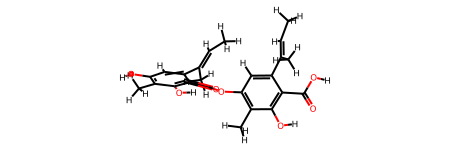

In [ ]:
train.at[2192,'Mol']
#train.head()

In [ ]:
train.head()

,Mol,Atom_number,atom_index,Shift
mol_id,,,,
2192,<rdkit.Chem.rdchem.Mol object at 0x78d6a9e8c120>,57,"[31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 4...","[6.2862277, 1.8515768, 3.06077, 1.8287755, 2.1..."
2193,<rdkit.Chem.rdchem.Mol object at 0x78d6a96578b0>,57,"[25, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...","[2.7089932, 5.5917945, 2.9136567, 1.3539634, 2..."
2194,<rdkit.Chem.rdchem.Mol object at 0x78d6a96dd3f0>,27,"[11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 2...","[10.779614, 3.808923, 1.8413619, 3.7931445, 2...."
2198,<rdkit.Chem.rdchem.Mol object at 0x78d6a96bfe60>,48,"[29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4...","[7.28793, 7.2717867, 7.111266, 7.9035625, 7.69..."
2202,<rdkit.Chem.rdchem.Mol object at 0x78d6a9885a10>,40,"[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 3...","[3.6359074, 3.890916, 3.798617, 3.6890798, 1.2..."


In [ ]:
test.to_pickle('/content/drive/MyDrive/CSC461/test.pkl.gz', compression='gzip')
valid.to_pickle('/content/drive/MyDrive/CSC461/valid.pkl.gz', compression='gzip')
train.to_pickle('/content/drive/MyDrive/CSC461/train.pkl.gz', compression='gzip')
import pickle
with open('/content/drive/MyDrive/CSC461/processed_inputs.p', 'wb') as file:
    pickle.dump({
        'inputs_train': training_inputs,
        'inputs_valid': valid_inputs,
        'inputs_test': test_inputs,
        'preprocessor': preprocessor,
    }, file)